<a href="https://colab.research.google.com/github/ClovisMallmann/XP_Projeto_Aplicado/blob/main/4_Cliente_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Carregamendo do Google drive para leitura dos Datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# **1 - Carregamento dos dados e Tratamento**

In [ ]:
tab_comportamentos_xls = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_comportamentos.xlsx')
tab_fraldas = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_fraldas.xlsx')
tab_medicamentos_xls = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_medicamentos.xlsx')

In [ ]:
tab_medicamentos_xls.head(10)

,DATA,m_1,m_2,m_3,m_4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2023-01-02,1,1,0,1,NaN,NaN,NaN,NaN,NaN
1,2023-01-03,1,1,0,1,NaN,NaN,NaN,NaN,NaN
2,2023-01-04,1,1,0,1,NaN,NaN,NaN,NaN,NaN
3,2023-01-05,1,1,0,1,NaN,NaN,NaN,NaN,NaN
4,2023-01-06,1,1,0,1,NaN,NaN,NaN,NaN,NaN
5,2023-01-07,1,1,0,1,NaN,NaN,NaN,NaN,NaN
6,2023-01-08,1,1,0,1,NaN,NaN,NaN,NaN,NaN
7,2023-01-09,1,1,0,1,NaN,NaN,NaN,NaN,NaN
8,2023-01-10,1,1,0,1,NaN,NaN,NaN,NaN,/
9,2023-01-11,1,1,0,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Excluindo as colunas desnecessárias

tab_medicamentos_xls = tab_medicamentos_xls.drop(columns=['Unnamed: 5', 'Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'])
tab_medicamentos_xls.head(10)

,DATA,m_1,m_2,m_3,m_4
0,2023-01-02,1,1,0,1
1,2023-01-03,1,1,0,1
2,2023-01-04,1,1,0,1
3,2023-01-05,1,1,0,1
4,2023-01-06,1,1,0,1
5,2023-01-07,1,1,0,1
6,2023-01-08,1,1,0,1
7,2023-01-09,1,1,0,1
8,2023-01-10,1,1,0,1
9,2023-01-11,1,1,0,1


In [ ]:
#Tratando a coluna DATA das tabelas para posteriormente,
#concatenar e formar uma base de dados só.


tab_comportamentos_xls["DATA"]= pd.to_datetime(tab_comportamentos_xls["DATA"])
tab_comportamentos_xls["DATA"].dt.strftime('%Y-%m-%d')

tab_fraldas["DATA"]= pd.to_datetime(tab_fraldas["DATA"])
tab_comportamentos_xls["DATA"].dt.strftime('%Y-%m-%d')


0      2023-01-02
1      2023-01-03
2      2023-01-04
3      2023-01-05
4      2023-01-06
          ...    
462    2024-04-08
463    2024-04-09
464    2024-04-10
465    2024-04-11
466    2024-04-12
Name: DATA, Length: 467, dtype: object

# **1.1 - Unindo as tabelas.**

In [ ]:

df_a = pd.merge(tab_comportamentos_xls, tab_fraldas, on=['DATA'], how='inner')
df_a

,DATA,c_a,f_1,f_2
0,2023-01-02,1,4,1
1,2023-01-03,1,3,1
2,2023-01-04,1,3,1
3,2023-01-05,0,3,1
4,2023-01-06,0,4,1
...,...,...,...,...
462,2024-04-08,0,5,1
463,2024-04-09,0,5,1
464,2024-04-10,0,4,1
465,2024-04-11,0,3,1


In [ ]:
Dados = pd.merge(df_a, tab_medicamentos_xls, on=['DATA'], how='inner')
Dados.head(10)

,DATA,c_a,f_1,f_2,m_1,m_2,m_3,m_4
0,2023-01-02,1,4,1,1,1,0,1
1,2023-01-03,1,3,1,1,1,0,1
2,2023-01-04,1,3,1,1,1,0,1
3,2023-01-05,0,3,1,1,1,0,1
4,2023-01-06,0,4,1,1,1,0,1
5,2023-01-07,1,4,1,1,1,0,1
6,2023-01-08,0,3,1,1,1,0,1
7,2023-01-09,0,4,1,1,1,0,1
8,2023-01-10,1,4,1,1,1,0,1
9,2023-01-11,0,3,1,1,1,0,1


In [ ]:
#Renomeando as colunas
Dados.columns=['Mes',	'Anormal','f_1',	'f_2',	'm_1',	'm_2',	'm_3',	'm_4']

In [ ]:
Dados

,Mes,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
0,2023-01-02,1,4,1,1,1,0,1
1,2023-01-03,1,3,1,1,1,0,1
2,2023-01-04,1,3,1,1,1,0,1
3,2023-01-05,0,3,1,1,1,0,1
4,2023-01-06,0,4,1,1,1,0,1
...,...,...,...,...,...,...,...,...
462,2024-04-08,0,5,1,1,1,0,1
463,2024-04-09,0,5,1,1,1,0,1
464,2024-04-10,0,4,1,1,1,0,1
465,2024-04-11,0,3,1,1,1,0,1


# **1.2 - Tratando a coluna Mês**

In [ ]:
#Indexando
Dados.index = Dados['Mes']

In [ ]:
#Após o index, dropando a coluna duplicada
Dados = Dados.drop(columns=['Mes'])

In [ ]:
#Modificando o DF
Df = Dados.groupby(pd.Grouper(freq='M')).sum()

#Criando um Df só com as médias para qualquer utilidade.
Df_media = Dados.groupby(pd.Grouper(freq='M')).mean()

In [ ]:
#Verificando
Df.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,
2023-01-31,8,107,30,30,30,0,30
2023-02-28,0,100,28,28,28,0,28
2023-03-31,5,109,31,31,31,0,31
2023-04-30,6,105,30,30,30,0,30
2023-05-31,7,103,31,31,31,0,31
2023-06-30,7,104,30,30,30,0,30
2023-07-31,8,109,31,31,31,0,31
2023-08-31,0,114,31,31,31,0,31
2023-09-30,12,108,30,30,30,0,30


In [ ]:

Df_media.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,
2023-01-31,0.266667,3.566667,1.000000,1.000000,1.0,0.000000,1.000000
2023-02-28,0.000000,3.571429,1.000000,1.000000,1.0,0.000000,1.000000
2023-03-31,0.161290,3.516129,1.000000,1.000000,1.0,0.000000,1.000000
2023-04-30,0.200000,3.500000,1.000000,1.000000,1.0,0.000000,1.000000
2023-05-31,0.225806,3.322581,1.000000,1.000000,1.0,0.000000,1.000000
2023-06-30,0.233333,3.466667,1.000000,1.000000,1.0,0.000000,1.000000
2023-07-31,0.258065,3.516129,1.000000,1.000000,1.0,0.000000,1.000000
2023-08-31,0.000000,3.677419,1.000000,1.000000,1.0,0.000000,1.000000
2023-09-30,0.400000,3.600000,1.000000,1.000000,1.0,0.000000,1.000000


# **1.3 - Modificações na coluna Mês: de Data completa para somente o Mês**

In [ ]:
#Criando uma lista com meses

Meses = ['Jan23','Fev23','Mar23','Abr23','Mai23','Jun23','Jul23','Ago23','Set23','Out23','Nov23','Dez23','Jan24','Fev24','Mar24','Abr24']

In [ ]:
#Inserindo a nova coluna com os Meses
Df.insert(0,'Meses',Meses,True)
Df_media.insert(0,'Meses', Meses, True)

In [ ]:
Df.head(20)

,Meses,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,,
2023-01-31,Jan23,8,107,30,30,30,0,30
2023-02-28,Fev23,0,100,28,28,28,0,28
2023-03-31,Mar23,5,109,31,31,31,0,31
2023-04-30,Abr23,6,105,30,30,30,0,30
2023-05-31,Mai23,7,103,31,31,31,0,31
2023-06-30,Jun23,7,104,30,30,30,0,30
2023-07-31,Jul23,8,109,31,31,31,0,31
2023-08-31,Ago23,0,114,31,31,31,0,31
2023-09-30,Set23,12,108,30,30,30,0,30


In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2023-01-31 to 2024-04-30
Freq: M
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Meses    16 non-null     object
 1   Anormal  16 non-null     int64 
 2   f_1      16 non-null     int64 
 3   f_2      16 non-null     int64 
 4   m_1      16 non-null     int64 
 5   m_2      16 non-null     int64 
 6   m_3      16 non-null     int64 
 7   m_4      16 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.1+ KB


In [ ]:
#Removendo o a coluna INDEX
Df = Df.reset_index(drop=True)
Df_media = Df_media.reset_index(drop=True)


In [ ]:
Df = Df.set_index('Meses')
Df_media = Df_media.set_index('Meses')


# **1.4 - Prontificando o DF para estudos**

In [ ]:
#Verificando
Df.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,8,107,30,30,30,0,30
Fev23,0,100,28,28,28,0,28
Mar23,5,109,31,31,31,0,31
Abr23,6,105,30,30,30,0,30
Mai23,7,103,31,31,31,0,31
Jun23,7,104,30,30,30,0,30
Jul23,8,109,31,31,31,0,31
Ago23,0,114,31,31,31,0,31
Set23,12,108,30,30,30,0,30


In [ ]:
Df_media.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,0.266667,3.566667,1.000000,1.000000,1.0,0.000000,1.000000
Fev23,0.000000,3.571429,1.000000,1.000000,1.0,0.000000,1.000000
Mar23,0.161290,3.516129,1.000000,1.000000,1.0,0.000000,1.000000
Abr23,0.200000,3.500000,1.000000,1.000000,1.0,0.000000,1.000000
Mai23,0.225806,3.322581,1.000000,1.000000,1.0,0.000000,1.000000
Jun23,0.233333,3.466667,1.000000,1.000000,1.0,0.000000,1.000000
Jul23,0.258065,3.516129,1.000000,1.000000,1.0,0.000000,1.000000
Ago23,0.000000,3.677419,1.000000,1.000000,1.0,0.000000,1.000000
Set23,0.400000,3.600000,1.000000,1.000000,1.0,0.000000,1.000000


In [ ]:
Df_media.describe()

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
count,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.000000
mean,0.237527,3.669009,1.068548,1.025654,1.0,0.030242,0.917895
std,0.146522,0.277866,0.193145,0.249878,0.0,0.120968,0.236539
min,0.000000,3.322581,1.000000,0.548387,1.0,0.000000,0.137931
25%,0.185484,3.512097,1.000000,1.000000,1.0,0.000000,1.000000
50%,0.229570,3.557527,1.000000,1.000000,1.0,0.000000,1.000000
75%,0.280645,3.749444,1.000000,1.000000,1.0,0.000000,1.000000
max,0.548387,4.258065,1.677419,1.862069,1.0,0.483871,1.000000


# **2 - Buscando Dados correlatos**

# *2.1 - Análise de Correlação*

<Axes: >

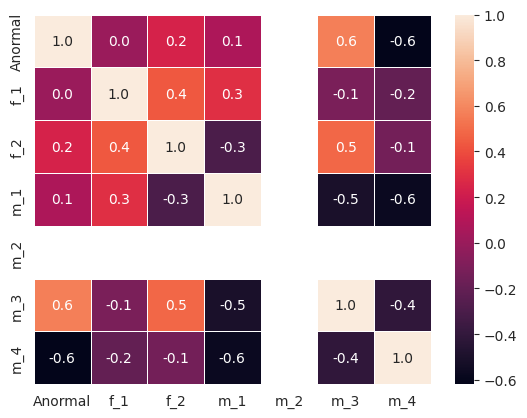

In [ ]:
#teste = Dados.corr()
sns.heatmap(Df_media.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)


# *Olhando mais de perto as variáveis com correlação 0.4, 0.5 e 0.6, as correlações entre o Comportamento Anormal, qtde fraldas do tipo 1, medicamento tipo 1 e medicamento tipo 3, chamam a atenção e veremos algum insight nos gráficos*

In [ ]:
Df_media_b = Df_media.drop(columns=['m_2','m_4'])
Df_media_b.head(10)

,Anormal,f_1,f_2,m_1,m_3
Meses,,,,,
Jan23,0.266667,3.566667,1.000000,1.000000,0.000000
Fev23,0.000000,3.571429,1.000000,1.000000,0.000000
Mar23,0.161290,3.516129,1.000000,1.000000,0.000000
Abr23,0.200000,3.500000,1.000000,1.000000,0.000000
Mai23,0.225806,3.322581,1.000000,1.000000,0.000000
Jun23,0.233333,3.466667,1.000000,1.000000,0.000000
Jul23,0.258065,3.516129,1.000000,1.000000,0.000000
Ago23,0.000000,3.677419,1.000000,1.000000,0.000000
Set23,0.400000,3.600000,1.000000,1.000000,0.000000


<Axes: >

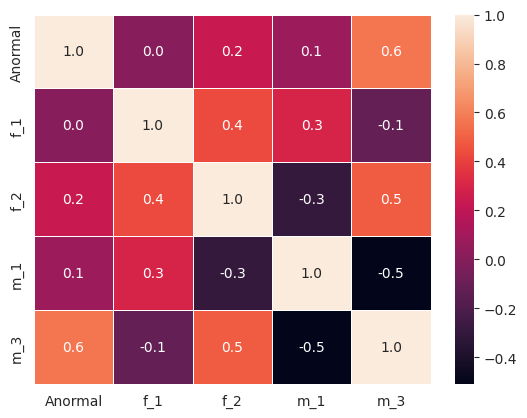

In [ ]:
#Mapa de calor
sns.heatmap(Df_media_b.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)

# *2.2 - Análise com gráfico de linhas*

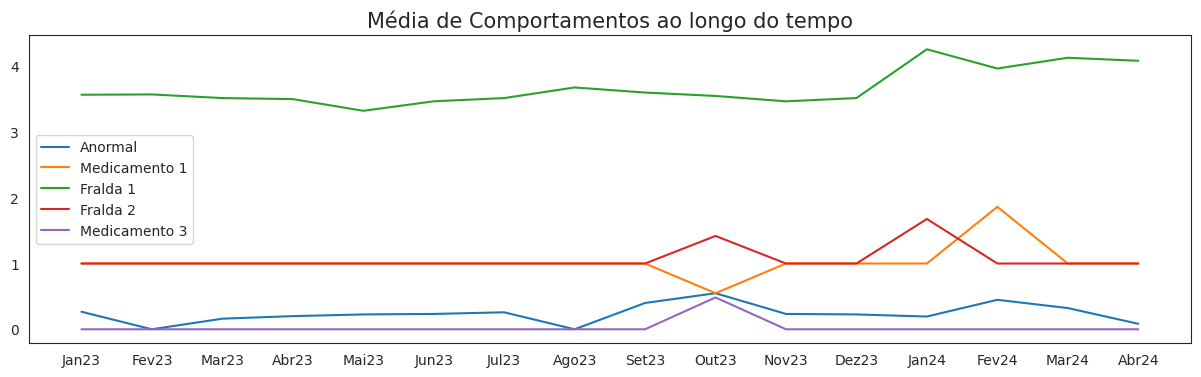

In [ ]:
#Buscando alterações de comportamento ao longo do tempo.

Dados_media_grafico = pd.DataFrame(Df_media_b.reset_index())

plt.subplots(figsize=(15,4))
plt.title("Média de Comportamentos ao longo do tempo", fontsize=15)
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['Anormal'],label='Anormal')
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['m_1'],label='Medicamento 1')
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['f_1'],label='Fralda 1')
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['f_2'],label='Fralda 2')
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['m_3'],label='Medicamento 3')

plt.legend()
plt.show()

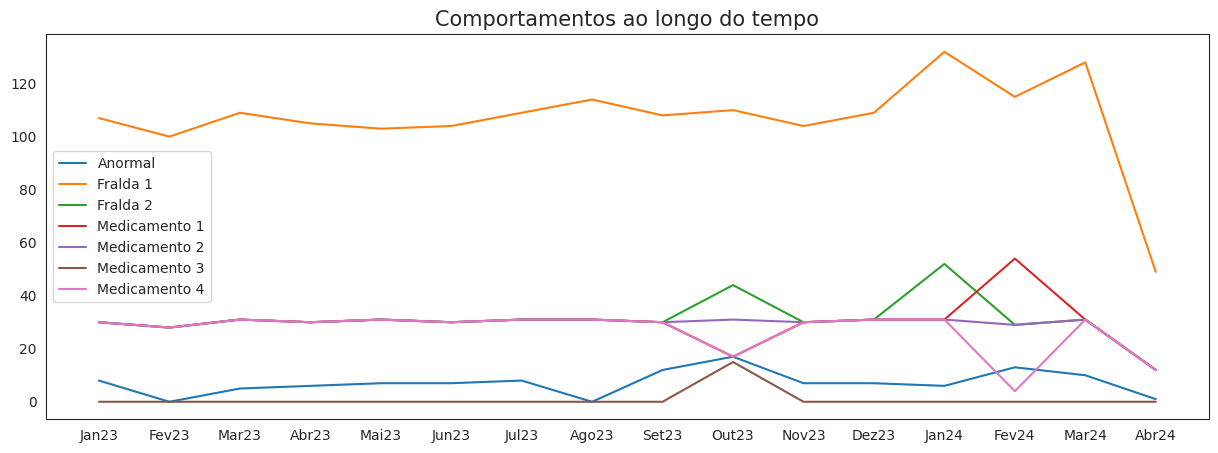

In [ ]:
#Buscando alterações de comportamento ao longo do tempo.

Dados_media_grafico = pd.DataFrame(Df_media_b.reset_index())

plt.subplots(figsize=(15,5))
plt.title("Comportamentos ao longo do tempo", fontsize=15)
plt.plot(Dados_media_grafico['Meses'], Df['Anormal'],label='Anormal')
plt.plot(Dados_media_grafico['Meses'], Df['f_1'],label='Fralda 1')
plt.plot(Dados_media_grafico['Meses'], Df['f_2'],label='Fralda 2')
plt.plot(Dados_media_grafico['Meses'], Df['m_1'],label='Medicamento 1')
plt.plot(Dados_media_grafico['Meses'], Df['m_2'],label='Medicamento 2')
plt.plot(Dados_media_grafico['Meses'], Df['m_3'],label='Medicamento 3')
plt.plot(Dados_media_grafico['Meses'], Df['m_4'],label='Medicamento 4')
plt.legend()
plt.show()

# *2.2.1 - Com o gráfico de linhas expondo alguns insights, Aprofunda-se com o mapa de calor.*

In [ ]:
#Puxando o Dataframe com o somatório por mês.
Df.head()

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,8,107,30,30,30,0,30
Fev23,0,100,28,28,28,0,28
Mar23,5,109,31,31,31,0,31
Abr23,6,105,30,30,30,0,30
Mai23,7,103,31,31,31,0,31


<Axes: >

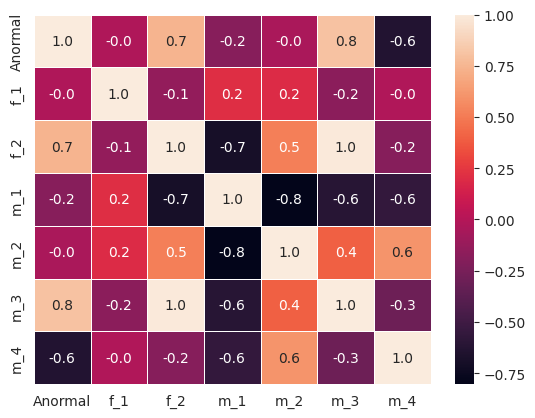

In [ ]:
 #Aplicando um filtro somente com os meses que possuem ANOMALIAS ACIMA da MEDIANA
 #da sua coluna.

 Anormal_filtro = Df.loc[(Df['Anormal']) > Df['Anormal'].median()]

 #Mapa de calor
 sns.heatmap(Anormal_filtro.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)

In [ ]:
Anormal_filtro.describe()

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,11.333333,112.833333,32.500000,32.166667,30.333333,2.500000,23.833333
std,3.444803,7.935154,5.683309,11.990274,0.816497,6.123724,11.125047
min,8.000000,107.000000,29.000000,17.000000,29.000000,0.000000,4.000000
25%,8.500000,108.250000,30.000000,30.000000,30.000000,0.000000,20.250000
50%,11.000000,109.500000,30.500000,30.500000,30.500000,0.000000,30.000000
75%,12.750000,113.750000,31.000000,31.000000,31.000000,0.000000,30.750000
max,17.000000,128.000000,44.000000,54.000000,31.000000,15.000000,31.000000


In [ ]:
Anormal_filtro

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,8,107,30,30,30,0,30
Jul23,8,109,31,31,31,0,31
Set23,12,108,30,30,30,0,30
Out23,17,110,44,17,31,15,17
Fev24,13,115,29,54,29,0,4
Mar24,10,128,31,31,31,0,31


# *2.2.2 - Com filtro aplicado, Qual o mês com maior anormalidade ?*

In [ ]:
#Anormal

Anormal_filtro.loc[Anormal_filtro['Anormal'] == Anormal_filtro['Anormal'].max()]


,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Out23,17,110,44,17,31,15,17
